# Import libraries

In [1]:
import numpy as np # use for array
import pandas as pd # use for reading dataset
from sklearn.preprocessing import LabelEncoder # Pre-Processing
import matplotlib.pyplot as plt # use for visualization 
import seaborn as sns  # use for visualization
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

# **Loading Dataset**

## In the USElectionResults19762020 folder, use the 1976-2020-house.csv



In [2]:
complete_df = pd.read_csv('1976-2020-house.csv')
complete_df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,fusion_ticket
0,1976,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,False,False,BILL DAVENPORT,DEMOCRAT,False,TOTAL,58906,157170,False,20220331,False
1,1976,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,False,False,JACK EDWARDS,REPUBLICAN,False,TOTAL,98257,157170,False,20220331,False
2,1976,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,False,False,WRITEIN,NaN,True,TOTAL,7,157170,False,20220331,False
3,1976,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,False,False,J CAROLE KEAHEY,DEMOCRAT,False,TOTAL,66288,156362,False,20220331,False
4,1976,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,False,False,"WILLIAM L ""BILL"" DICKINSON",REPUBLICAN,False,TOTAL,90069,156362,False,20220331,False


In [3]:
# Calculating Voter turnout percentage
complete_df['Voter turnout percentage'] = complete_df['candidatevotes'] / complete_df['totalvotes'] * 100
complete_df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,...,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,fusion_ticket,Voter turnout percentage
0,1976,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,False,...,BILL DAVENPORT,DEMOCRAT,False,TOTAL,58906,157170,False,20220331,False,37.479163
1,1976,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,False,...,JACK EDWARDS,REPUBLICAN,False,TOTAL,98257,157170,False,20220331,False,62.516384
2,1976,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,False,...,WRITEIN,NaN,True,TOTAL,7,157170,False,20220331,False,0.004454
3,1976,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,False,...,J CAROLE KEAHEY,DEMOCRAT,False,TOTAL,66288,156362,False,20220331,False,42.393932
4,1976,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,False,...,"WILLIAM L ""BILL"" DICKINSON",REPUBLICAN,False,TOTAL,90069,156362,False,20220331,False,57.602870


# Voter turnout percentage by state for the years 2010 and 2012.

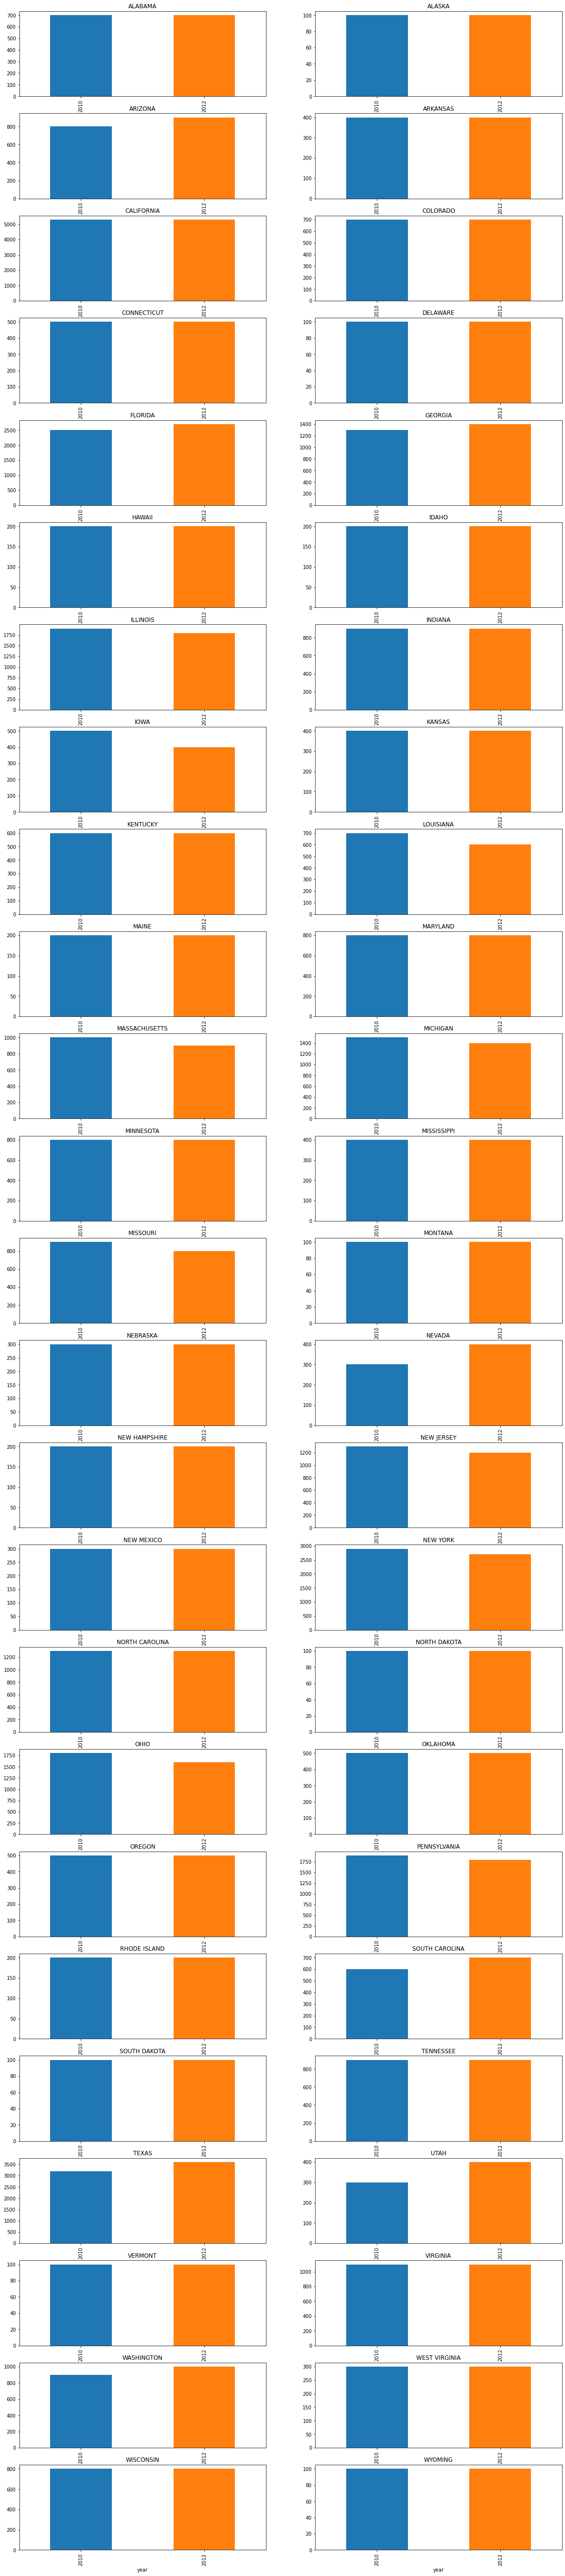

In [4]:
# Extract the data from 2010 to 2012 and plot turn out
extracted = complete_df[(complete_df["year"] >= 2010) & (complete_df["year"] <= 2012)]# plotting the voter turn out of each state
copy = extracted.copy()

plt.figure(figsize= (20,100))
for n, state in enumerate(copy["state"].unique()):
    plt.subplot(26, 2, n+1)
    plt.title(state)
    new = copy[copy["state"] == state].copy()
    new = new.groupby("year").sum()
    new['Voter turnout percentage'].plot(kind = 'bar')

In [5]:
# Applying preprocessing to encode the objects type of data to integers
df = complete_df.copy()
# remove null values
df.dropna(inplace=True)

# Label Encoding
for index in df.dtypes[df.dtypes == object].index:
    le = LabelEncoder()
    df[index] = le.fit_transform(df[index])

df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,...,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,fusion_ticket,Voter turnout percentage
0,1976,0,1,1,63,41,0,1,0,0,...,757,73,False,0,58906,157170,False,20220331,False,37.479163
1,1976,0,1,1,63,41,0,1,0,0,...,4555,254,False,0,98257,157170,False,20220331,False,62.516384
3,1976,0,1,1,63,41,0,2,0,0,...,4480,73,False,0,66288,156362,False,20220331,False,42.393932
4,1976,0,1,1,63,41,0,2,0,0,...,11714,254,False,0,90069,156362,False,20220331,False,57.602870
6,1976,0,1,1,63,41,0,3,0,0,...,814,73,False,0,106935,108048,False,20220331,False,98.969902


# Using historic data for turnout, up to 8 years back. So, to 
# estimate turnout in 2010 you may use data up to 2002

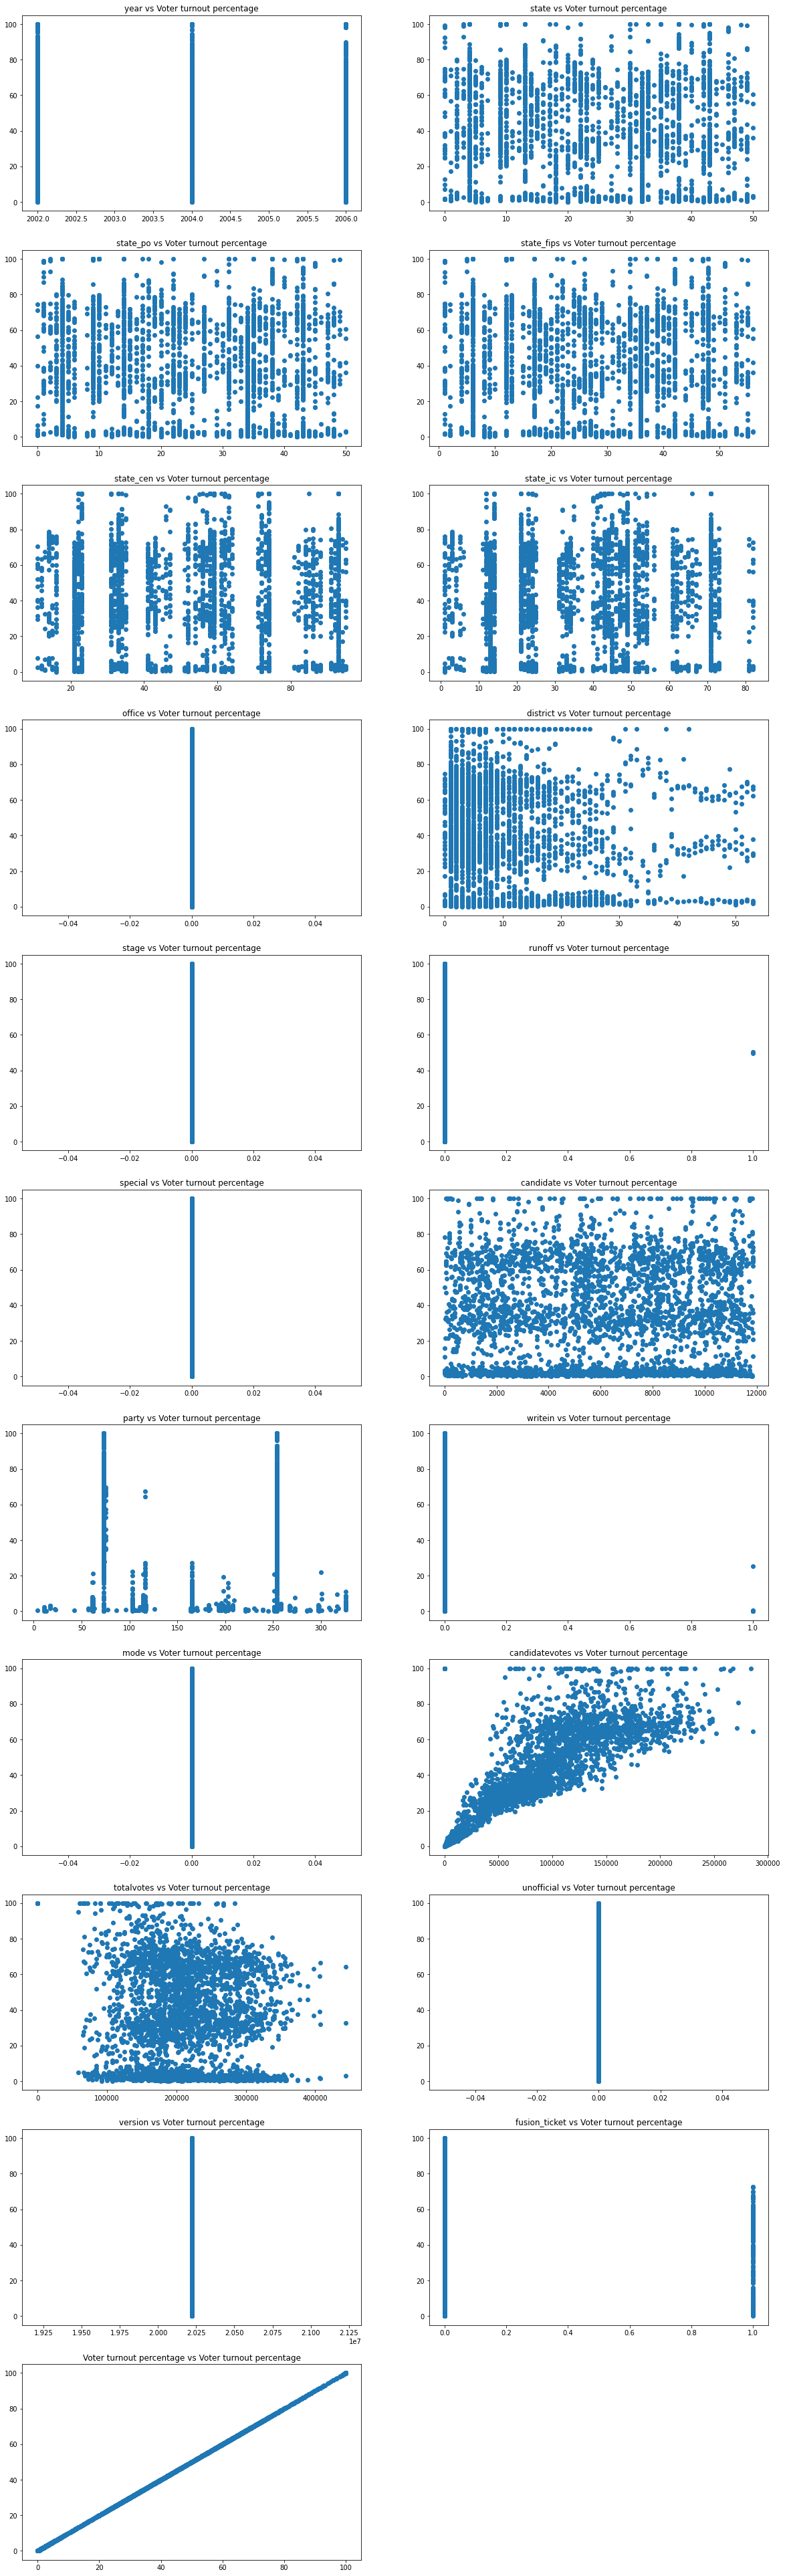

In [6]:
# displaying historic data from 2002 to 2010
import seaborn as sns
# extract historic data
historic_data = df[(df["year"] >= 2002) & (df["year"] <= 2010)]

plt.figure(figsize=(20,70))
for i, col in enumerate(historic_data.columns):
    plt.subplot(11,2, i+1)
    plt.title(col + " vs Voter turnout percentage")
    plt.scatter(historic_data[col], historic_data['Voter turnout percentage'])

# Creating at least 6 features to predict voter turnout

<AxesSubplot:xlabel='correlation percentage'>

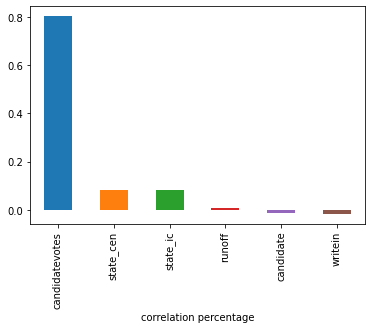

In [7]:
# 6 most important features of the dataset
# utilize the co-relaton to extract important features
copy = df.copy()
plt.xlabel("correlation percentage")
copy.corr()['Voter turnout percentage'].sort_values(ascending=False)[1:][:6].plot(kind= 'bar')

In [8]:
# Here are the selected features
# names of extracted features
col_names = copy.corr()['Voter turnout percentage'].sort_values(ascending=False)[1:][:6].index
col_names

Index(['candidatevotes', 'state_cen', 'state_ic', 'runoff', 'candidate',
       'writein'],
      dtype='object')

#**Applying at least 3 machine learning algorithms to predict voter turnout percentage for at least 48 states.**

Showing the extract dataframe with only records of 2010 and 2o12

In [9]:
extracted_df = complete_df[(complete_df['year'] <= 2012) & (complete_df['year'] >= 2010)]
extracted_df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,...,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,fusion_ticket,Voter turnout percentage
22553,2010,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,NaN,...,DAVID WALTER,CONSTITUTION,False,TOTAL,26357,156281,False,20220331,False,16.865134
22554,2010,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,NaN,...,JO BONNER,REPUBLICAN,False,TOTAL,129063,156281,False,20220331,False,82.583935
22555,2010,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,NaN,...,WRITEIN,NaN,True,TOTAL,861,156281,False,20220331,False,0.550931
22556,2010,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,NaN,...,BOBBY BRIGHT,DEMOCRAT,False,TOTAL,106865,219028,False,20220331,False,48.790566
22557,2010,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,NaN,...,MARTHA ROBY,REPUBLICAN,False,TOTAL,111645,219028,False,20220331,False,50.972935


# Extract Feature and Target

In [10]:
# X is our selected columns
X = df[col_names].astype(int)
# y is our regression target label
y = df["Voter turnout percentage"]

# Apply linear reg model ,Providing feature importance for linear reg.Visually present the predictions in 2010 and 2012 for California Florida, South Dakota, and Wyoming

Feature: candidatevotes, Score: 0.00038
Feature: state_cen, Score: 0.19372
Feature: state_ic, Score: -0.1835
Feature: runoff, Score: 19.1605
Feature: candidate, Score: -2e-05
Feature: writein, Score: -4.72653


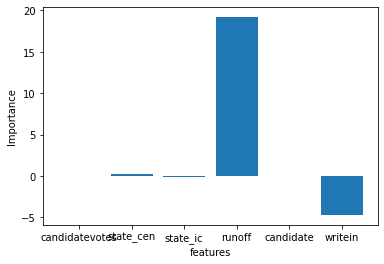

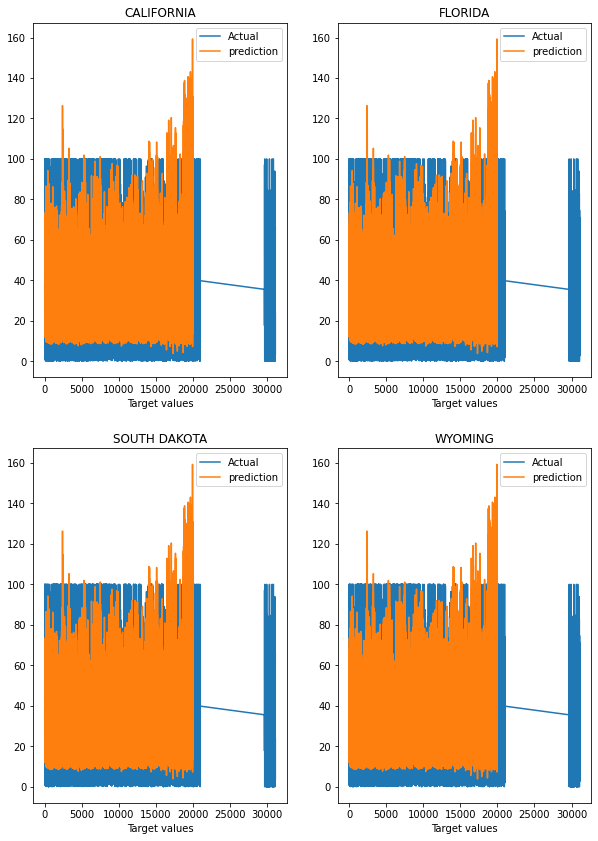

In [11]:
# Linear Regression application
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
LR.fit(X, y)
importance = LR.coef_

# Displaying features importances
for i,v in enumerate(importance):
    print('Feature: '+ X.columns[i] +', Score: '+ str(round(v,5)))
    
# plot feature importance
plt.bar(X.columns, importance)
plt.ylabel("Importance")
plt.xlabel("features")
plt.show()

# Prediction visualization over foure countries
plt.figure(figsize=(10,30))
for i, country in enumerate(['CALIFORNIA', 'FLORIDA', 'SOUTH DAKOTA', 'WYOMING']):
    plt.subplot(4,2, i+1)
    features = complete_df[complete_df["state"] == country][X.columns]
    predictions = LR.predict(X)
    plt.title(country)
    plt.plot(y, label="Actual")
    plt.plot(predictions, label="prediction")
    plt.xlabel("Target values")
    plt.legend()

# Applying Decision tree reg model ,Providing feature importance for Decision tree reg .Visually present your predictions in 2010 and 2012 for California Florida, South Dakota, and Wyoming

Feature: candidatevotes, Score: 0.88964
Feature: state_cen, Score: 0.02226
Feature: state_ic, Score: 0.02073
Feature: runoff, Score: 0.00023
Feature: candidate, Score: 0.06714
Feature: writein, Score: 1e-05


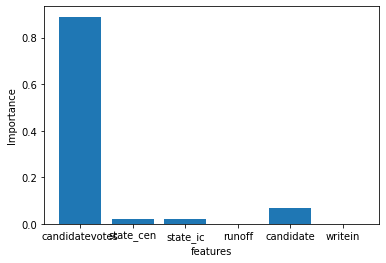

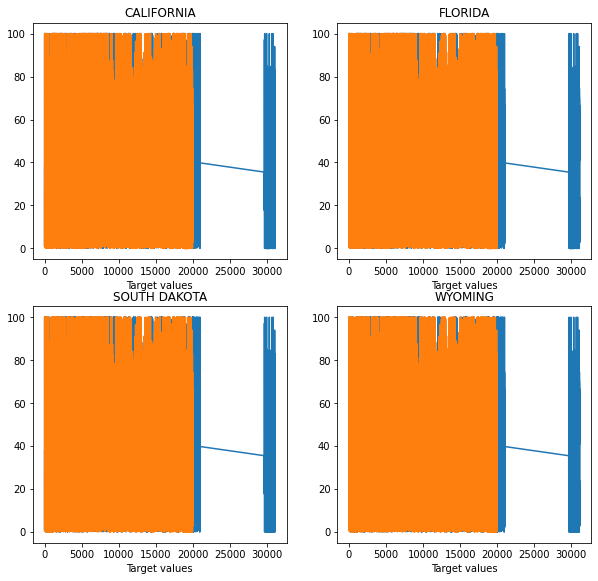

In [13]:
# Applying Decision tree Model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='mse',splitter='best',min_samples_split=2,min_samples_leaf=1)
dtr.fit(X, y)
importance = dtr.feature_importances_

# Here are we calculating feature importace
for i,v in enumerate(importance):
    print('Feature: '+ X.columns[i] +', Score: '+ str(round(v,5)))
    
# plot feature importance
plt.bar(X.columns, importance)
plt.ylabel("Importance")
plt.xlabel("features")
plt.show()

# Predictions visualization over four countries
plt.figure(figsize=(10,20))
for i, country in enumerate(['CALIFORNIA', 'FLORIDA', 'SOUTH DAKOTA', 'WYOMING']):
    plt.subplot(4,2, i+1)
    features = complete_df[complete_df["state"] == country][X.columns]
    predictions = dtr.predict(X)
    plt.title(country)
    plt.plot(y, label="Actual")
    plt.plot(predictions, label="prediction")
    plt.xlabel("Target values")

# Applying Random forest reg model ,Provide feature importance for Random forest reg .Visually present the predictions in 2010 and 2012 for California Florida, South Dakota, and Wyoming

Feature: candidatevotes, Score: 0.88655
Feature: state_cen, Score: 0.02231
Feature: state_ic, Score: 0.02277
Feature: runoff, Score: 0.00021
Feature: candidate, Score: 0.06815
Feature: writein, Score: 0.0


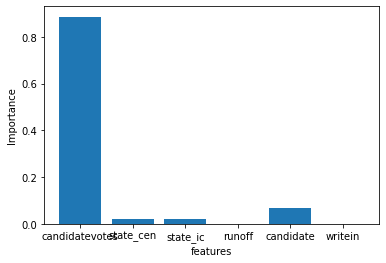

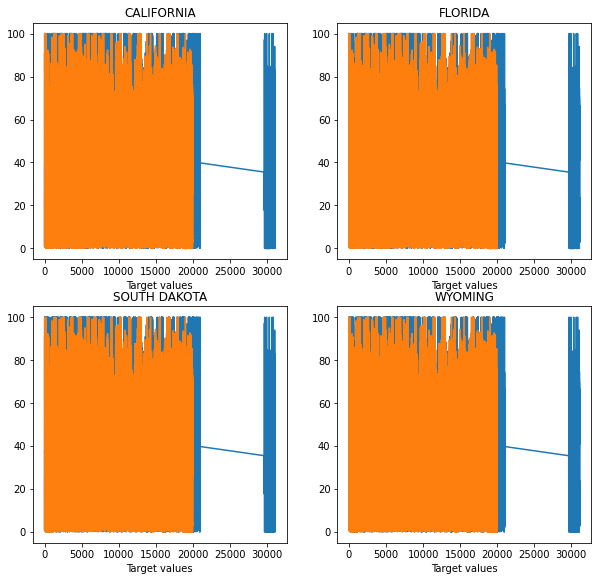

In [14]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100,criterion='mse',max_depth=None)
rfr.fit(X,y)
importance = rfr.feature_importances_

for i,v in enumerate(importance):
    print('Feature: '+ X.columns[i] +', Score: '+ str(round(v,5)))
plt.bar(X.columns, importance)
plt.ylabel("Importance")
plt.xlabel("features")
plt.show()

plt.figure(figsize=(10,20))
for i, country in enumerate(['CALIFORNIA', 'FLORIDA', 'SOUTH DAKOTA', 'WYOMING']):
    plt.subplot(4,2, i+1)
    features = complete_df[complete_df["state"] == country][X.columns]
    predictions = rfr.predict(X)
    plt.title(country)
    plt.plot(y, label="Actual")
    plt.plot(predictions, label="prediction")
    plt.xlabel("Target values")

Defininng the evaluation function for measuring performnaces

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
def evaluate_model(model, X, y):
    model.fit(X, y)
    pred = model.predict(X)
    
    score = r2_score(y, pred)
    mse = mean_squared_error(y, pred)
    
    return [score, mse] 

In [16]:
# Applying preprocessing
df = complete_df.copy()
df.dropna(inplace=True)

# Label Encoding
for index in df.dtypes[df.dtypes == object].index:
    le = LabelEncoder()
    df[index] = le.fit_transform(df[index])

df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,...,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,fusion_ticket,Voter turnout percentage
0,1976,0,1,1,63,41,0,1,0,0,...,757,73,False,0,58906,157170,False,20220331,False,37.479163
1,1976,0,1,1,63,41,0,1,0,0,...,4555,254,False,0,98257,157170,False,20220331,False,62.516384
3,1976,0,1,1,63,41,0,2,0,0,...,4480,73,False,0,66288,156362,False,20220331,False,42.393932
4,1976,0,1,1,63,41,0,2,0,0,...,11714,254,False,0,90069,156362,False,20220331,False,57.602870
6,1976,0,1,1,63,41,0,3,0,0,...,814,73,False,0,106935,108048,False,20220331,False,98.969902


# **Evaluate the performance of linear Reg (on the 48 or more states)**

In [17]:
lr_result ={}
lr_result = lr_result.fromkeys(['model', 'state', 'r2_score', 'MSE'])

for k in lr_result.keys():
    lr_result[k] = []
    
country_names = list(complete_df["state"].unique())

for n, country in enumerate(df["state"].unique()):
    features = df[df["state"] == country][X.columns]
    target = df[df["state"] == country]["Voter turnout percentage"] 
    res = evaluate_model(LR, features, target)
    
    lr_result['model'].append(LR)
    lr_result['state'].append(country_names[country])
    lr_result['r2_score'].append(res[0])
    lr_result['MSE'].append(res[1])
    
lr_result = pd.DataFrame(lr_result)
lr_result.head()

,model,state,r2_score,MSE
0,LinearRegression(),ALABAMA,0.749779,272.630063
1,LinearRegression(),ALASKA,0.828201,107.068335
2,LinearRegression(),ARIZONA,0.717535,191.393433
3,LinearRegression(),ARKANSAS,0.145890,592.643035
4,LinearRegression(),CALIFORNIA,0.753356,179.644094



# Rank the states by linear Reg predicted turnout

<AxesSubplot:xlabel='state', ylabel='Importance'>

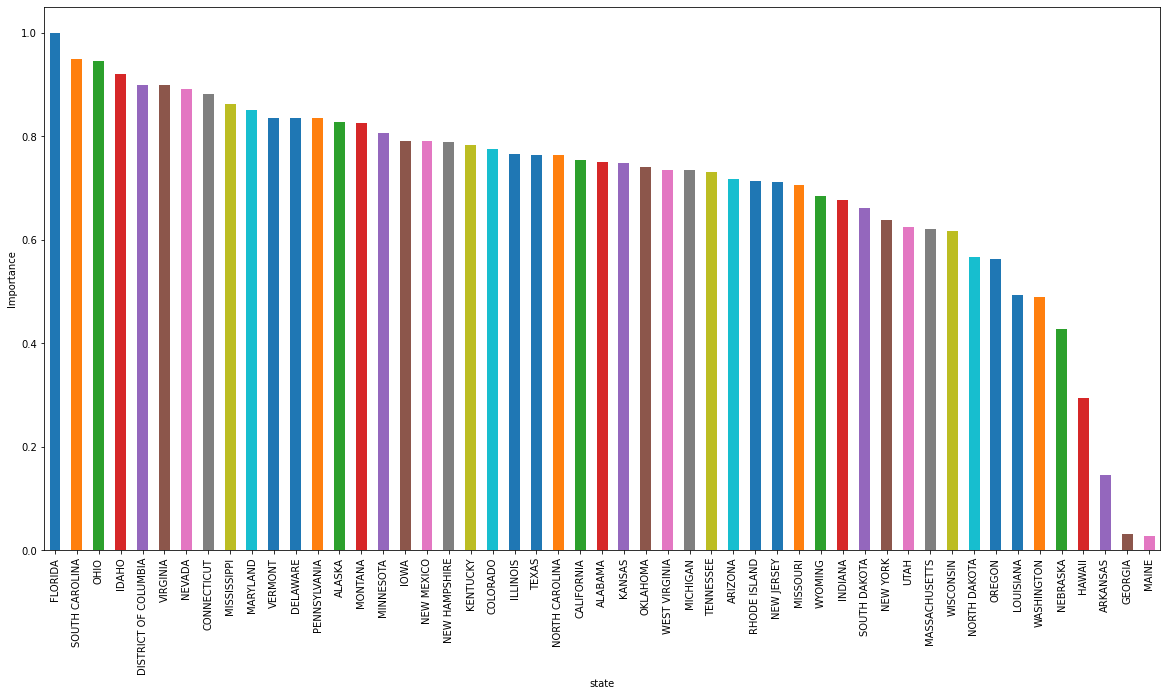

In [18]:
# Here the results shows that the model of florida is very good
lr_result.index = lr_result['state']
plt.ylabel("Importance")
lr_result.r2_score.sort_values(ascending=False).plot(kind='bar',figsize = (20,10))

# **Evaluate the performance of Decision tree Reg (on the 48 or more states)**

In [19]:
dtr_result ={}
dtr_result = dtr_result.fromkeys(['model', 'state', 'r2_score', 'MSE'])

for k in dtr_result.keys():
    dtr_result[k] = []
    
country_names = list(complete_df["state"].unique())

for n, country in enumerate(df["state"].unique()):
    features = df[df["state"] == country][X.columns]
    target = df[df["state"] == country]["Voter turnout percentage"] 
    res = evaluate_model(dtr, features, target)
    
    dtr_result['model'].append(dtr)
    dtr_result['state'].append(country_names[country])
    dtr_result['r2_score'].append(res[0])
    dtr_result['MSE'].append(res[1])
    
dtr_result = pd.DataFrame(dtr_result)
dtr_result.head()

,model,state,r2_score,MSE
0,DecisionTreeRegressor(),ALABAMA,1.000000,0.00000
1,DecisionTreeRegressor(),ALASKA,1.000000,0.00000
2,DecisionTreeRegressor(),ARIZONA,1.000000,0.00000
3,DecisionTreeRegressor(),ARKANSAS,1.000000,0.00000
4,DecisionTreeRegressor(),CALIFORNIA,0.999973,0.01956



# Rank the states Decision tree Reg predicted turnout

<AxesSubplot:xlabel='state', ylabel='Importance'>

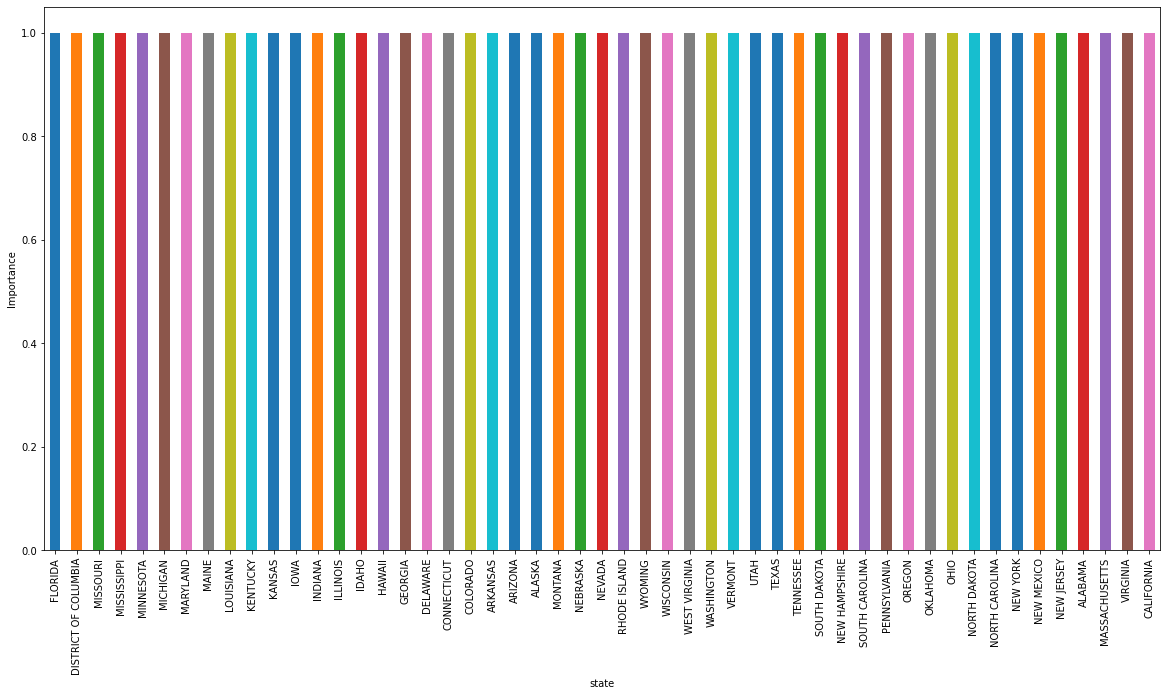

In [20]:
# Here the results shows that the Decision tree model perform good over all states
dtr_result.index = dtr_result['state']
plt.ylabel("Importance")
dtr_result.r2_score.sort_values(ascending=False).plot(kind='bar',figsize = (20,10))

# **Evaluate the performance of Random forest Reg (on the 48 or more states)**

In [21]:
rfr_result ={}
rfr_result = rfr_result.fromkeys(['model', 'state', 'r2_score', 'MSE'])

for k in rfr_result.keys():
    rfr_result[k] = []
    
country_names = list(complete_df["state"].unique())

for n, country in enumerate(df["state"].unique()):
    features = df[df["state"] == country][X.columns]
    target = df[df["state"] == country]["Voter turnout percentage"] 
    res = evaluate_model(rfr, features, target)
    
    rfr_result['model'].append(rfr)
    rfr_result['state'].append(country_names[country])
    rfr_result['r2_score'].append(res[0])
    rfr_result['MSE'].append(res[1])
    
rfr_result = pd.DataFrame(rfr_result)
rfr_result.head()

,model,state,r2_score,MSE
0,"(DecisionTreeRegressor(max_features='auto', ra...",ALABAMA,0.974167,28.146769
1,"(DecisionTreeRegressor(max_features='auto', ra...",ALASKA,0.981997,11.219552
2,"(DecisionTreeRegressor(max_features='auto', ra...",ARIZONA,0.978128,14.819842
3,"(DecisionTreeRegressor(max_features='auto', ra...",ARKANSAS,0.981149,13.080067
4,"(DecisionTreeRegressor(max_features='auto', ra...",CALIFORNIA,0.979891,14.646510



# Rank the states by Random forest Reg predicted turnout

<AxesSubplot:xlabel='state', ylabel='Importance'>

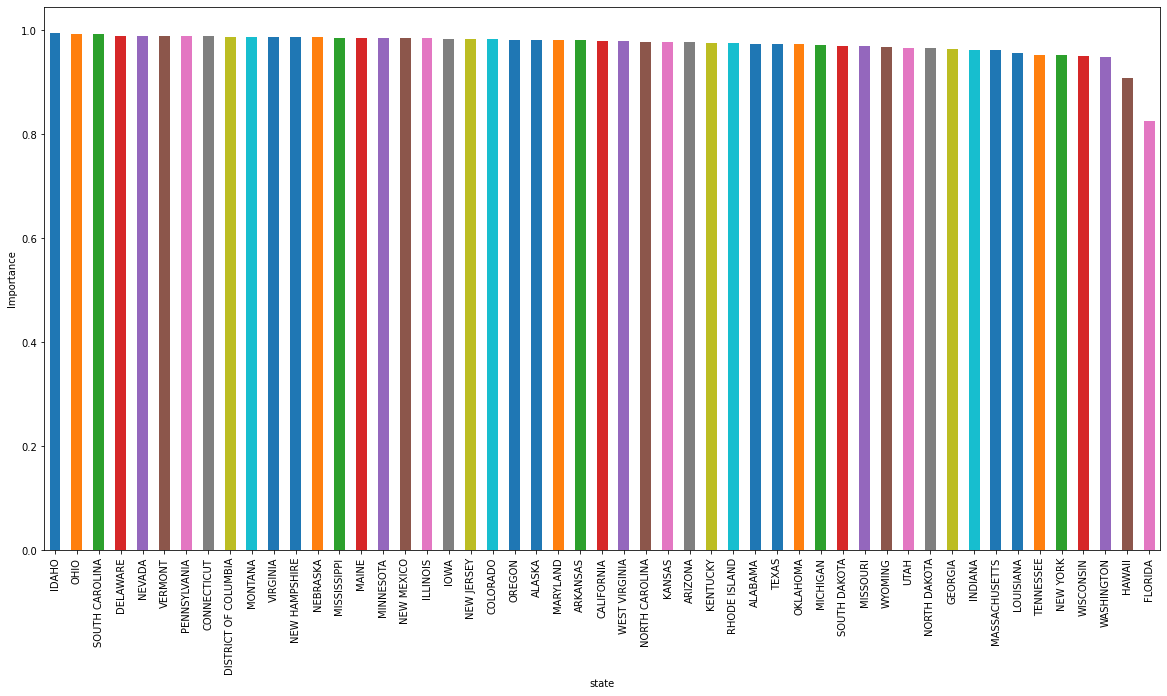

In [22]:
# Here the results shows that the Random Forest Regressor model perform good over IDAHO state
rfr_result.index = rfr_result['state']
plt.ylabel("Importance")
rfr_result.r2_score.sort_values(ascending=False).plot(kind='bar',figsize = (20,10))

# **The 5 states that the turnout estimate was least successful**

In [23]:
# Here the lr doesnot perform well over the following countries
less_performed_countries = rfr_result.sort_values(by ='r2_score')[:5]['state'].index
less_performed_countries

Index(['FLORIDA', 'HAWAII', 'WASHINGTON', 'WISCONSIN', 'NEW YORK'], dtype='object', name='state')

# Making modifications to your model and features so that at least 2 of the states that were in the bottom 5 will be ranked in the within the top 25

In [24]:
from sklearn.model_selection import GridSearchCV
# Grid Search to fin-tune the model
parameter = {'bootstrap': [True, False],
             'max_depth': [10, 20],
             'n_estimators': [200, 300]}

Random_forest_result = {}
Random_forest_result = Random_forest_result.fromkeys(['model', 'state', 'r2_score', 'MSE'])

for k in Random_forest_result.keys():
    Random_forest_result[k] = []
    
for country in less_performed_countries:
    features = df[df["state"] == country_names.index(country)][X.columns]
    target = df[df["state"] == country_names.index(country)]["Voter turnout percentage"] 
    res = evaluate_model(rfr, features, target)
    gs = GridSearchCV(rfr, parameter, scoring='r2')
    res = evaluate_model(gs, features, target)
    
    Random_forest_result['model'].append(rfr)
    Random_forest_result['state'].append(country)
    Random_forest_result['r2_score'].append(res[0])
    Random_forest_result['MSE'].append(res[1])

Random_forest_result = pd.DataFrame(Random_forest_result)
Random_forest_result.head()

,model,state,r2_score,MSE
0,"(DecisionTreeRegressor(max_features='auto', ra...",FLORIDA,1.000000,9.792289e-27
1,"(DecisionTreeRegressor(max_features='auto', ra...",HAWAII,0.860381,7.876288e+01
2,"(DecisionTreeRegressor(max_features='auto', ra...",WASHINGTON,0.920656,6.709121e+01
3,"(DecisionTreeRegressor(max_features='auto', ra...",WISCONSIN,0.948431,3.338896e+01
4,"(DecisionTreeRegressor(max_features='auto', ra...",NEW YORK,0.953483,2.467338e+01


Text(0, 0.5, 'Importance')

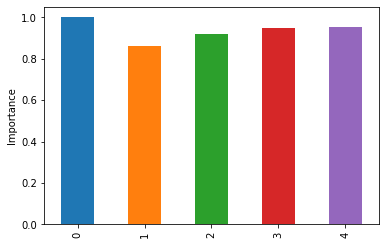

In [25]:
Random_forest_result.r2_score.plot(kind='bar')
plt.ylabel("Importance")